# SNP Extration with BLAST

Tiger Yi's notebook on using BLAST local alignment to extract SNP mutation

BLAST link:

https://blast.ncbi.nlm.nih.gov/Blast.cgi

Standard Nucleotide BLAST blastn:

https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&PAGE_TYPE=BlastSearch&BLAST_SPEC=&LINK_LOC=blasttab&LAST_PAGE=blastn

Nucleotide link:

https://www.ncbi.nlm.nih.gov/nuccore



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data file path

%cd /content/drive/MyDrive/DS596-Bioinfo-Data/data
!ls


/content/drive/MyDrive/DS596/project/data
blast_C_AA038924.1_subject.xml	blast_C_AA038930.1_subject.xml	C_AA038926.1.fasta
blast_C_AA038924.1.xml		blast_C_AA038930.1.xml		C_AA038927.1.fasta
blast_C_AA038925.1_subject.xml	blast_C_AA038931.1_subject.xml	C_AA038928.1.fasta
blast_C_AA038925.1.xml		blast_C_AA038931.1.xml		C_AA038929.1.fasta
blast_C_AA038926.1_subject.xml	blast_C_AA038932.1_subject.xml	C_AA038930.1.fasta
blast_C_AA038926.1.xml		blast_C_AA038932.1.xml		C_AA038931.1.fasta
blast_C_AA038927.1_subject.xml	blast_ON563414.3_subject.xml	C_AA038932.1.fasta
blast_C_AA038927.1.xml		blast_ON563414.3.xml		figure2.png
blast_C_AA038928.1_subject.xml	blast_output.xml		NC_063383.1.fasta
blast_C_AA038928.1.xml		C_AA038923.1.fasta		ON563414.3.fasta
blast_C_AA038929.1_subject.xml	C_AA038924.1.fasta		Protein-Annotation-uniprot.csv
blast_C_AA038929.1.xml		C_AA038925.1.fasta		table.png


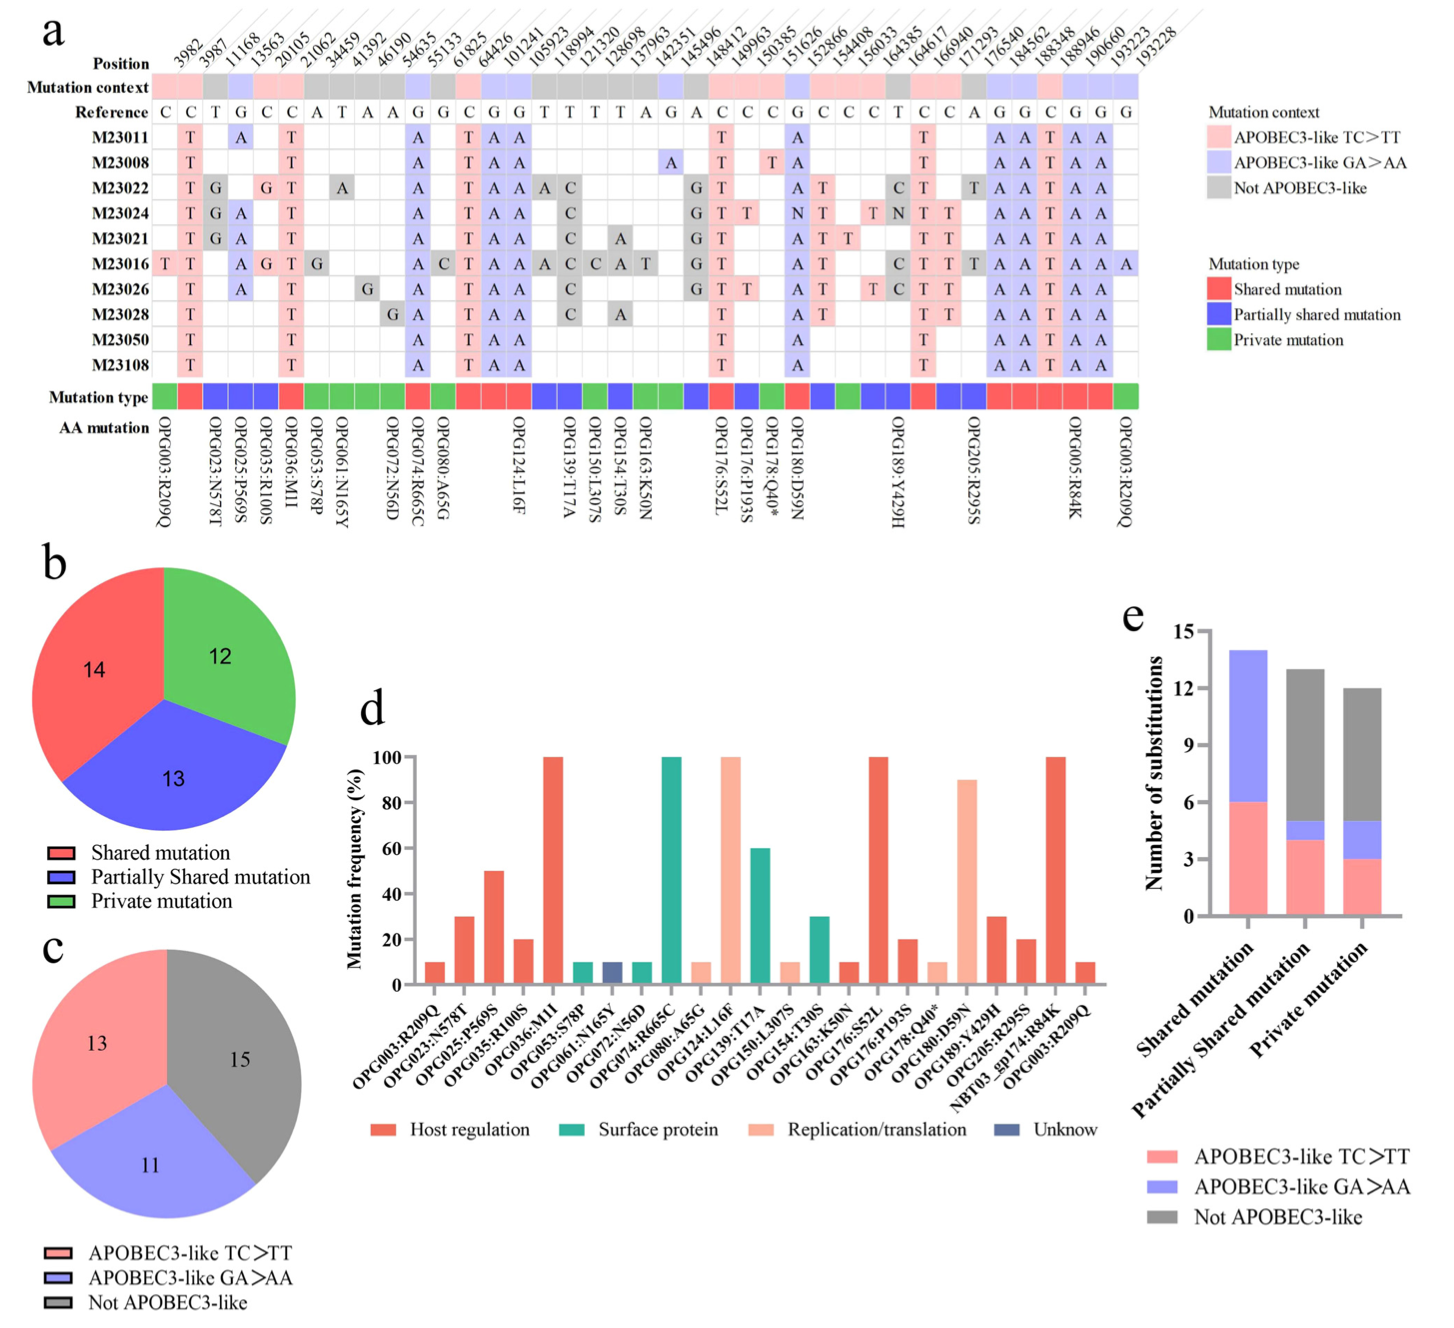

In [ ]:
from IPython.display import Image, display

display(Image("figure2.png",width=1000,height=1000))


In [ ]:
# Install dependencies
!pip install biopython --quiet

# !apt-get update
!apt-get install -y ncbi-blast+


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  liblmdb0 ncbi-data
The following NEW packages will be installed:
  liblmdb0 ncbi-blast+ ncbi-data
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 15.9 MB of archives.
After this operation, 71.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblmdb0 amd64 0.9.24-1build2 [47.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-data all 6.1.20170106+dfsg1-9 [3,519 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-blast+ amd64 2.12.0+ds-3build1 [12.3 MB]
Fetched 15.9 MB in 4s (4,051 kB/s)
Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../liblmdb0_0.

# Align 2 sequences

In [ ]:
# Define the path to your FASTA files
path = "/content/drive/MyDrive/DS596-Bioinfo-Data/data"

from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML


/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [ ]:
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML
import os

def run_blast_and_extract_region(query_file, subject_file, position, flanking_length=50):
    """
    Run BLASTN between two sequences and extract the alignment around a given position.

    :param query_file: Path to the query FASTA file.
    :param subject_file: Path to the subject FASTA file.
    :param position: Position in the subject sequence to examine.
    :param flanking_length: Number of bases to show around the position.
    """
    subject_name = os.path.splitext(os.path.basename(subject_file))[0]
    query_name = os.path.splitext(os.path.basename(query_file))[0]
    max_name_length = max(len(subject_name), len(query_name))

    # Run BLAST locally
    blastn_cline = NcbiblastnCommandline(
        query=query_file,
        subject=subject_file,
        outfmt=5,  # XML output for parsing
        out="blast_output.xml"
    )
    stdout, stderr = blastn_cline()

    # Parse BLAST results
    with open("blast_output.xml") as result_handle:
        blast_records = NCBIXML.parse(result_handle)
        for blast_record in blast_records:
            for alignment in blast_record.alignments:
                for hsp in alignment.hsps:
                    # Check if the position falls within this alignment
                    if hsp.sbjct_start <= position <= hsp.sbjct_end:
                        # Extract flanking sequence region
                        start = max(hsp.sbjct_start, position - flanking_length)
                        end = min(hsp.sbjct_end, position + flanking_length)

                        query_region = hsp.query[start - hsp.sbjct_start:end - hsp.sbjct_start]
                        subject_region = hsp.sbjct[start - hsp.sbjct_start:end - hsp.sbjct_start]
                        alignment_symbols = hsp.match[start - hsp.sbjct_start:end - hsp.sbjct_start]

                        # Display the alignment
                        print(f"{subject_name.ljust(max_name_length)}  {start}    {subject_region}  {end}")
                        print(f"                      {alignment_symbols}")
                        print(f"{query_name.ljust(max_name_length)}  {start}    {query_region}  {end}")
                        return

    print("No alignment found at the specified position.")




In [ ]:
# Example usage
# Replace with filenames of your choice

query_file = f"{path}/C_AA038923.1.fasta"
subject_file = f"{path}/NC_063383.1.fasta"

position = 3987  # Example position to examine
flanking_length = 5  # Number of bases to include around the position

run_blast_and_extract_region(query_file, subject_file, position, flanking_length)




NC_063383.1   3982    CGCTTCTCAG  3992
                      ||||| ||||
C_AA038923.1  3982    CGCTTTTCAG  3992


In [ ]:
# !ls

# Multiple Sequences Single Positions


In [ ]:
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML
import glob
import os
from Bio import SeqIO

# Define the path to your FASTA files
path = "/content/drive/MyDrive/DS596/project/data"

# List all query files (excluding the subject file)
subject_file = f"{path}/NC_063383.1.fasta"
query_files = [f"{path}/ON563414.3.fasta"] + glob.glob(f"{path}/C_AA*.fasta")

# Sort the query files in alphabetical order
query_files.sort()

# re-order the query to let MPXV_USA_2022_MA001 to be on the top
query_files = [query_files[-1]] + query_files[0:-1]


def get_description_from_fasta(file_path):
    """
    Extract the description from the FASTA header (first line starting with '>').
    """
    with open(file_path, "r") as fasta_file:
        first_record = next(SeqIO.parse(fasta_file, "fasta"))
        description = first_record.description
    return description

def run_blast_and_print_results(subject_file, query_files, position, flanking_length=50):
    """
    Run BLASTN between the anchor subject file and multiple query FASTA files.

    :param subject_file: Path to the subject FASTA file (anchor).
    :param query_files: List of query FASTA files to align.
    :param position: Position in the subject sequence to examine.
    :param flanking_length: Number of bases to show around the position.
    """
    # Extract subject name from file
    subject_name = os.path.splitext(os.path.basename(subject_file))[0]
    subject_description = get_description_from_fasta(subject_file)
    subject_part = subject_description.split(" ", 4)[0]

    max_name_length = max(len(subject_part), max(len(get_description_from_fasta(q).split(" ", 4)[4]) for q in query_files))

    subject_output = None  # To store and print the subject only once

    for query_file in query_files:
        # Extract query name from file
        query_name = os.path.splitext(os.path.basename(query_file))[0]

        query_description = get_description_from_fasta(query_file)
        query_part = query_description.split(" ", 4)[4]

        # Run BLAST locally
        blastn_cline = NcbiblastnCommandline(
            query=query_file,
            subject=subject_file,
            outfmt=5,  # XML output for parsing
            out=f"blast_{query_name}.xml"
        )
        stdout, stderr = blastn_cline()

        # Parse BLAST results
        with open(f"blast_{query_name}.xml") as result_handle:
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    for hsp in alignment.hsps:
                        # Check if the position falls within this alignment
                        if hsp.sbjct_start <= position <= hsp.sbjct_end:
                            # Extract flanking sequence region
                            start = max(hsp.sbjct_start, position - flanking_length)
                            end = min(hsp.sbjct_end, position + flanking_length)

                            # Extract sequences
                            subject_region = hsp.sbjct[start - hsp.sbjct_start:end - hsp.sbjct_start]
                            query_region = hsp.query[start - hsp.sbjct_start:end - hsp.sbjct_start]
                            alignment_symbols = hsp.match[start - hsp.sbjct_start:end - hsp.sbjct_start]

                            # Print subject (only once at the top)
                            if subject_output is None:
                                subject_output = (
                                    f"{subject_part.ljust(max_name_length)}  {start}  {subject_region}  {end}"
                                )
                                print(subject_output)

                            # Print query result
                            print(" " * (max_name_length + len(str(start)) + 4) + alignment_symbols)
                            print(f"{query_part.ljust(max_name_length)}  {start}  {query_region}  {end}")
                            break


In [ ]:
query_files

['/content/drive/MyDrive/DS596/project/data/ON563414.3.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038923.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038924.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038925.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038926.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038927.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038928.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038929.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038930.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038931.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038932.1.fasta']

In [ ]:
# Define the position to examine and flanking length
position = 3982
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)


position 3982 with flanking length 2

NC_063383.1                          3980  ATCG  3984
                                           ||||
MPXV_USA_2022_MA001                  3980  ATCG  3984
                                           ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  3980  ATCG  3984
                                           || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  3980  ATTG  3984
                                           ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  3980  ATCG  3984
                                           ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  3980  ATCG  3984
                                           ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  3980  ATCG  3984
                                           ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  3980  ATCG  3984
                                           ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  3980  ATCG  3984
                                           ||||
MPXV/human/CHN/GDCDC_GZ_M23050/2023  3980  A

In [ ]:
# Define the position to examine and flanking length
position = 3987
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)


position 3987 with flanking length 2

NC_063383.1                          3985  TTCT  3989
                                           ||||
MPXV_USA_2022_MA001                  3985  TTCT  3989
                                           || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  3985  TTTT  3989
                                           || |
MPXV/human/CHN/GDCDC_GZ_M23050/2023  3985  T

In [ ]:
# Define the position to examine and flanking length
position = 11168
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 11168 with flanking length 2

NC_063383.1                          11166  TGTT  11170
                                            ||||
MPXV_USA_2022_MA001                  11166  TGTT  11170
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  11166  TGTT  11170
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  11166  TGTT  11170
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  11166  TGGT  11170
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  11166  TGGT  11170
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  11166  TGGT  11170
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  11166  TGTT  11170
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  11166  TGTT  11170
                                            ||||
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 13563
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 13563 with flanking length 2

NC_063383.1                          13561  CGGA  13565
                                            ||||
MPXV_USA_2022_MA001                  13561  CGGA  13565
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  13561  CGAA  13565
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  13561  CGAA  13565
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  13561  CGAA  13565
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  13561  CGGA  13565
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  13561  CGAA  13565
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  13561  CGAA  13565
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  13561  CGGA  13565
                                            ||||
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 20105
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 20105 with flanking length 2

NC_063383.1                          20103  ATCC  20107
                                            ||||
MPXV_USA_2022_MA001                  20103  ATCC  20107
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  20103  ATCC  20107
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  20103  ATGC  20107
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  20103  ATCC  20107
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  20103  ATGC  20107
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  20103  ATCC  20107
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  20103  ATCC  20107
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  20103  ATCC  20107
                                            ||||
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 21062
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 21062 with flanking length 2

NC_063383.1                          21060  GTCA  21064
                                            ||||
MPXV_USA_2022_MA001                  21060  GTCA  21064
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  21060  GTTA  21064
                                            || |
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 34459
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 34459 with flanking length 2

NC_063383.1                          34457  CGGA  34461
                                            || |
MPXV_USA_2022_MA001                  34457  CGAA  34461
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  34457  CGAA  34461
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  34457  CGGA  34461
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  34457  CGAA  34461
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  34457  CGAA  34461
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  34457  CGAA  34461
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  34457  CGAA  34461
                                            || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  34457  CGAA  34461
                                            || |
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 41392
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 41392 with flanking length 2

NC_063383.1                          41390  ATTG  41394
                                            ||||
MPXV_USA_2022_MA001                  41390  ATTG  41394
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  41390  ATTG  41394
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  41390  ATTG  41394
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  41390  ATTG  41394
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  41390  ATAG  41394
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  41390  ATTG  41394
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  41390  ATTG  41394
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  41390  ATTG  41394
                                            ||||
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 46190
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 46190 with flanking length 2

NC_063383.1                          46188  CGAA  46192
                                            ||||
MPXV_USA_2022_MA001                  46188  CGAA  46192
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  46188  CGAA  46192
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  46188  CGAA  46192
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  46188  CGAA  46192
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  46188  CGAA  46192
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  46188  CGAA  46192
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  46188  CGGA  46192
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  46188  CGAA  46192
                                            ||||
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 54635
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 54635 with flanking length 2

NC_063383.1                          54633  AGGA  54637
                                            || |
MPXV_USA_2022_MA001                  54633  AGAA  54637
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  54633  AGAA  54637
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  54633  AGAA  54637
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  54633  AGAA  54637
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  54633  AGAA  54637
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  54633  AGAA  54637
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  54633  AGAA  54637
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  54633  AGGA  54637
                                            || |
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 55133
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 55133 with flanking length 2

NC_063383.1                          55131  ACGA  55135
                                            ||||
MPXV_USA_2022_MA001                  55131  ACGA  55135
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  55131  ACAA  55135
                                            || |
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 61825
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 61825 with flanking length 2

NC_063383.1                          61823  TGGC  61827
                                            ||||
MPXV_USA_2022_MA001                  61823  TGGC  61827
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  61823  TGGC  61827
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  61823  TGCC  61827
                                            ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  61823  TGGC  61827
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  61823  TGGC  61827
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  61823  TGGC  61827
                                            ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  61823  TGGC  61827
                                            ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  61823  TGGC  61827
                                            ||||
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 64426
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 64426 with flanking length 2

NC_063383.1                          64424  GTCG  64428
                                            ||||
MPXV_USA_2022_MA001                  64424  GTCG  64428
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  64424  GTTG  64428
                                            || |
MPXV/human/CHN/G

In [ ]:
# Define the position to examine and flanking length
position = 101241
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 101241 with flanking length 2

NC_063383.1                          101239  TAGA  101243
                                             ||||
MPXV_USA_2022_MA001                  101239  TAGA  101243
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  101239  TAAA  101243
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  101239  TAAA  101243
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  101239  TAAA  101243
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  101239  TAAA  101243
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  101239  TAAA  101243
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  101239  TAAA  101243
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  101239  TAAA  101243
                                      

In [ ]:
# Define the position to examine and flanking length
position = 105923
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 105923 with flanking length 2

NC_063383.1                          105921  AAGA  105925
                                             ||||
MPXV_USA_2022_MA001                  105921  AAGA  105925
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  105921  AAAA  105925
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  105921  AAAA  105925
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  105921  AAAA  105925
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  105921  AAAA  105925
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  105921  AAAA  105925
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  105921  AAAA  105925
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  105921  AAAA  105925
                                      

In [ ]:
# Define the position to examine and flanking length
position = 118994
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 118994 with flanking length 2

NC_063383.1                          118992  AATA  118996
                                             ||||
MPXV_USA_2022_MA001                  118992  AATA  118996
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  118992  AATA  118996
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  118992  AAAA  118996
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  118992  AATA  118996
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  118992  AAAA  118996
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  118992  AATA  118996
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  118992  AATA  118996
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  118992  AATA  118996
                                      

In [ ]:
# Define the position to examine and flanking length
position = 121320
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 121320 with flanking length 2

NC_063383.1                          121318  GGCG  121322
                                             || |
MPXV_USA_2022_MA001                  121318  GGTG  121322
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  121318  GGTG  121322
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  121318  GGCG  121322
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  121318  GGCG  121322
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  121318  GGCG  121322
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  121318  GGCG  121322
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  121318  GGCG  121322
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  121318  GGCG  121322
                                      

In [ ]:
# Define the position to examine and flanking length
position = 128698
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 128698 with flanking length 2

NC_063383.1                          128696  GTCG  128700
                                             || |
MPXV_USA_2022_MA001                  128696  GTTG  128700
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  128696  GTTG  128700
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  128696  GTCG  128700
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  128696  GTTG  128700
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  128696  GTTG  128700
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  128696  GTTG  128700
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  128696  GTTG  128700
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  128696  GTTG  128700
                                      

In [ ]:
# Define the position to examine and flanking length
position = 137963
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 137963 with flanking length 2

NC_063383.1                          137961  TTTA  137965
                                             ||||
MPXV_USA_2022_MA001                  137961  TTTA  137965
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  137961  AGTC  137965
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  137961  AGAC  137965
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  137961  AGAC  137965
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  137961  AGTC  137965
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  137961  AGTC  137965
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  137961  AGTC  137965
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  137961  AGAC  137965
                                      

In [ ]:
# Define the position to examine and flanking length
position = 142351
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 142351 with flanking length 2

NC_063383.1                          142349  ATAA  142353
                                             ||||
MPXV_USA_2022_MA001                  142349  ATAA  142353
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  142349  AAAT  142353
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  142349  AATT  142353
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  142349  AAAT  142353
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  142349  AAAT  142353
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  142349  AAAT  142353
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  142349  AAAT  142353
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  142349  AAAT  142353
                                      

In [ ]:
# Define the position to examine and flanking length
position = 145496
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 145496 with flanking length 2

NC_063383.1                          145494  GTGA  145498
                                             ||||
MPXV_USA_2022_MA001                  145494  GTGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  145494  AAGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  145494  AAGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  145494  AAGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  145494  AAGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  145494  AAGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  145494  AAGA  145498
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  145494  AAGA  145498
                                      

In [ ]:
# Define the position to examine and flanking length
position = 148412
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 148412 with flanking length 2

NC_063383.1                          148410  TCAA  148414
                                             ||||
MPXV_USA_2022_MA001                  148410  TCAA  148414
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  148410  AAAA  148414
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  148410  AAGA  148414
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  148410  AAGA  148414
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  148410  AAGA  148414
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  148410  AAGA  148414
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  148410  AAGA  148414
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  148410  AAAA  148414
                                      

In [ ]:
# Define the position to examine and flanking length
position = 149963
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 149963 with flanking length 2

NC_063383.1                          149961  TATT  149965
                                             ||||
MPXV_USA_2022_MA001                  149961  TATT  149965
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  149961  TTTA  149965
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  149961  TTTA  149965
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  149961  TTTA  149965
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  149961  TTTA  149965
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  149961  TTTA  149965
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  149961  TTTA  149965
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  149961  TTTA  149965
                                      

In [ ]:
# Define the position to examine and flanking length
position = 150385
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 150385 with flanking length 2

NC_063383.1                          150383  GTAT  150387
                                             ||||
MPXV_USA_2022_MA001                  150383  GTAT  150387
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  150383  TTCC  150387
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  150383  TTCC  150387
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  150383  TTCC  150387
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  150383  TTCC  150387
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  150383  TTTC  150387
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  150383  TTTC  150387
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  150383  TTCC  150387
                                      

In [ ]:
# Define the position to examine and flanking length
position = 151626
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 151626 with flanking length 2

NC_063383.1                          151624  TTCC  151628
                                             ||||
MPXV_USA_2022_MA001                  151624  TTCC  151628
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  151624  CTCA  151628
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  151624  CTCA  151628
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  151624  CTCA  151628
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  151624  CTCA  151628
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  151624  CTCA  151628
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  151624  CTCA  151628
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  151624  CTCA  151628
                                      

In [ ]:
# Define the position to examine and flanking length
position = 152866
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 152866 with flanking length 2

NC_063383.1                          152864  TGAA  152868
                                             ||||
MPXV_USA_2022_MA001                  152864  TGAA  152868
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  152864  ACAA  152868
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  152864  ACAA  152868
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  152864  ACAA  152868
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  152864  ACAA  152868
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  152864  ACAA  152868
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  152864  ACAA  152868
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23050/2023  152864  ACAA  152868
                                      

In [ ]:
# Define the position to examine and flanking length
position = 154408
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 154408 with flanking length 2

NC_063383.1                          154406  GTAG  154410
                                             ||||
MPXV_USA_2022_MA001                  154406  GTAG  154410
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  154406  GTCG  154410
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  154406  GTTG  154410
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  154406  GTTG  154410
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  154406  GTTG  154410
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  154406  GTTG  154410
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  154406  GTTG  154410
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  154406  GTTG  154410
                                      

In [ ]:
# Define the position to examine and flanking length
position = 156033
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 156033 with flanking length 2

NC_063383.1                          156031  AATG  156035
                                             ||||
MPXV_USA_2022_MA001                  156031  AATG  156035
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  156031  GTCA  156035
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  156031  GTCA  156035
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  156031  GTTA  156035
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  156031  GTCA  156035
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  156031  GTCA  156035
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  156031  GTCA  156035
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  156031  GTCA  156035
                                      

In [ ]:
# Define the position to examine and flanking length
position = 164385
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 164385 with flanking length 2

NC_063383.1                          164383  GCTG  164387
                                             ||||
MPXV_USA_2022_MA001                  164383  GCTG  164387
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  164383  GTCA  164387
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  164383  GTCA  164387
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  164383  GTCA  164387
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  164383  GTCA  164387
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  164383  GTTA  164387
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  164383  GTTA  164387
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  164383  GTCA  164387
                                      

In [ ]:
# Define the position to examine and flanking length
position = 164617
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 164617 with flanking length 2

NC_063383.1                          164615  TAAA  164619
                                             ||||
MPXV_USA_2022_MA001                  164615  TAAA  164619
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  164615  AATA  164619
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  164615  AACA  164619
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  164615  AATA  164619
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  164615  AACA  164619
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  164615  AAYA  164619
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  164615  AACA  164619
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  164615  AATA  164619
                                      

In [ ]:
# Define the position to examine and flanking length
position = 166940
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 166940 with flanking length 2

NC_063383.1                          166938  GACG  166942
                                             ||||
MPXV_USA_2022_MA001                  166938  GACG  166942
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  166938  GTTG  166942
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  166938  GTTG  166942
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  166938  GTTG  166942
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  166938  GTTG  166942
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  166938  GTTG  166942
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  166938  GTTG  166942
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  166938  GTTG  166942
                                      

In [ ]:
# Define the position to examine and flanking length
position = 171293
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 171293 with flanking length 2

NC_063383.1                          171291  GCAA  171295
                                             ||||
MPXV_USA_2022_MA001                  171291  GCAA  171295
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  171291  ATCA  171295
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23016/2023  171291  ATCA  171295
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  171291  ATCA  171295
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  171291  ATCA  171295
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  171291  ATTA  171295
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  171291  ATCA  171295
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  171291  ATCA  171295
                                      

In [ ]:
# Define the position to examine and flanking length
position = 176540
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 176540 with flanking length 2

NC_063383.1                          176538  TTTT  176542
                                             ||||
MPXV_USA_2022_MA001                  176538  TTTT  176542
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  176538  AGAA  176542
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  176538  AGTA  176542
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  176538  AGAA  176542
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  176538  AGTA  176542
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  176538  AGAA  176542
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  176538  AGAA  176542
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  176538  AGAA  176542
                                      

In [ ]:
# Define the position to examine and flanking length
position = 184562
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 184562 with flanking length 2

NC_063383.1                          184560  AAAA  184564
                                             ||||
MPXV_USA_2022_MA001                  184560  AAAA  184564
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  184560  GCAA  184564
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  184560  GCAA  184564
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  184560  GCAA  184564
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  184560  GCAA  184564
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  184560  GCAA  184564
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  184560  GCAA  184564
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  184560  GCAA  184564
                                      

In [ ]:
# Define the position to examine and flanking length
position = 188348
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 188348 with flanking length 2

NC_063383.1                          188346  CGTA  188350
                                             ||||
MPXV_USA_2022_MA001                  188346  CGTA  188350
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  188346  ATAA  188350
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  188346  ATAA  188350
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  188346  ATAA  188350
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  188346  ATAA  188350
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  188346  ATAA  188350
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  188346  ATAA  188350
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  188346  ATAA  188350
                                      

In [ ]:
# Define the position to examine and flanking length
position = 188946
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 188946 with flanking length 2

NC_063383.1                          188944  TAAT  188948
                                             ||||
MPXV_USA_2022_MA001                  188944  TAAT  188948
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  188944  GTTA  188948
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  188944  GTTA  188948
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  188944  GTTA  188948
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  188944  GTTA  188948
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  188944  GTTA  188948
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  188944  GTTA  188948
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  188944  GTTA  188948
                                      

In [ ]:
# Define the position to examine and flanking length
position = 190660
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 190660 with flanking length 2

NC_063383.1                          190658  AATT  190662
                                             ||||
MPXV_USA_2022_MA001                  190658  AATT  190662
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  190658  CAAA  190662
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  190658  CAAA  190662
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  190658  CAAA  190662
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  190658  CAAA  190662
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  190658  CAAA  190662
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  190658  CAAA  190662
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  190658  CAAA  190662
                                      

In [ ]:
# Define the position to examine and flanking length
position = 193223
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 193223 with flanking length 2

NC_063383.1                          193221  GCGA  193225
                                             ||||
MPXV_USA_2022_MA001                  193221  GCGA  193225
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23011/2023  193221  GAAA  193225
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  193221  GAAA  193225
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23021/2023  193221  GAAA  193225
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23022/2023  193221  GAAA  193225
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23024/2023  193221  GAAA  193225
                                             || |
MPXV/human/CHN/GDCDC_SZ_M23026/2023  193221  GAAA  193225
                                             || |
MPXV/human/CHN/GDCDC_FS_M23028/2023  193221  GAAA  193225
                                      

In [ ]:
# Define the position to examine and flanking length
position = 193228
flanking_length = 2

print(f"position {position} with flanking length {flanking_length}")
print()

# Run the function
run_blast_and_print_results(subject_file, query_files, position, flanking_length)



position 193228 with flanking length 2

NC_063383.1                          193226  CTGA  193230
                                             ||||
MPXV_USA_2022_MA001                  193226  CTGA  193230
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23011/2023  193226  GCGA  193230
                                             || |
MPXV/human/CHN/GDCDC_GZ_M23016/2023  193226  GCAA  193230
                                             ||||
MPXV/human/CHN/GDCDC_GZ_M23021/2023  193226  GCGA  193230
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23022/2023  193226  GCGA  193230
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23024/2023  193226  GCGA  193230
                                             ||||
MPXV/human/CHN/GDCDC_SZ_M23026/2023  193226  GCGA  193230
                                             ||||
MPXV/human/CHN/GDCDC_FS_M23028/2023  193226  GCGA  193230
                                      

# Multiple Sequences Multiple Positions

In [ ]:
import matplotlib.pyplot as plt
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML
import glob
import os
from Bio import SeqIO
from prettytable import PrettyTable
import pandas as pd

# Define the path to your FASTA files
path = "/content/drive/MyDrive/DS596/project/data"

# List all query files (excluding the subject file)
subject_file = f"{path}/NC_063383.1.fasta"
query_files = [f"{path}/ON563414.3.fasta"] + glob.glob(f"{path}/C_AA*.fasta")

# Sort the query files in alphabetical order
query_files.sort()

# re-order the query to let MPXV_USA_2022_MA001 to be on the top
query_files = [query_files[-1]] + query_files[0:-1]


def get_description_from_fasta(file_path):
    """
    Extract the description from the FASTA header (first line starting with '>').
    """
    with open(file_path, "r") as fasta_file:
        first_record = next(SeqIO.parse(fasta_file, "fasta"))
        description = first_record.description
    return description

In [ ]:
query_files

['/content/drive/MyDrive/DS596/project/data/ON563414.3.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038923.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038924.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038925.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038926.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038927.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038928.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038929.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038930.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038931.1.fasta',
 '/content/drive/MyDrive/DS596/project/data/C_AA038932.1.fasta']

In [ ]:
df = pd.read_csv("Protein-Annotation-uniprot.csv")
df.head()


Position    Code                   Protein Name  \
0    193228  OPG003  Ankyrin repeat protein OPG003   
1    190660  OPG005                 Protein OPG005   
2    176540  OPG205  Serine proteinase inhibitor 1   
3    164617  OPG189  Ankyrin repeat protein OPG189   
4    152866  OPG180                     DNA ligase   

                                            Function Mutation  \
0  May be involved in virus-host protein interact...    R209Q   
1                                                NaN     R84K   
2  Plays a role in mediating viral host range. Ma...    R295S   
3  Contributes to viral release without involving...    Y429H   
4  DNA ligase that seals nicks in double-stranded...     D59N   

                   Notes                                               Link  
0  REPEAT 175-223 ANK 2   https://www.uniprot.org/uniprotkb/A0A7H0DNH0/e...  
1                    NaN  https://www.uniprot.org/uniprotkb/A0A7H0DNG7/e...  
2                    NaN  https://www.uniprot.org/uniprotkb/A0A7H0DNG4/e...  
3                    NaN  https://www.uniprot.org/uniprotkb/A0A7H0DNF1/e...  
4                    NaN  https://www.uniprot.org/uniprotkb/A0A7H0DNE6/e...

In [ ]:
(df[df["Position"]==41392]["Mutation"])

16    N165Y
Name: Mutation, dtype: object

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML
from Bio import SeqIO
from prettytable import PrettyTable
import os

# df = pd.read_csv("Protein-Annotation-uniprot.csv")

def get_description_from_fasta(file_path):
    """
    Extract the description from the FASTA header (first line starting with '>').
    """
    with open(file_path, "r") as fasta_file:
        first_record = next(SeqIO.parse(fasta_file, "fasta"))
        description = first_record.description
    return description

def run_blast_and_print_table(subject_file, query_files, positions, flanking_length=1, output_image="table.png", csv="Protein-Annotation-uniprot.csv"):
    """
    Run BLASTN between the anchor subject file and multiple query FASTA files for multiple positions,
    display results as a pairwise table (with alignment rows), and save as an image.
    """
    # read the csv
    df = pd.read_csv(csv)

    # Extract subject name
    subject_description = get_description_from_fasta(subject_file)
    subject_part = subject_description.split(" ", 4)[0]

    # Initialize table headers
    table = PrettyTable()
    table.field_names = ["Genome"] + [str(pos) for pos in positions]

    # Initialize results dictionary
    results = {}

    # Add the subject genome to results
    results[subject_part] = {}

    # Run BLAST for each query file
    for query_file in query_files:
        query_name = os.path.splitext(os.path.basename(query_file))[0]
        query_description = get_description_from_fasta(query_file)
        query_part = query_description.split(" ", 4)[4]

        # Run BLAST locally
        blastn_cline = NcbiblastnCommandline(
            query=query_file,
            subject=subject_file,
            outfmt=5,  # XML output for parsing
            out=f"blast_{query_name}.xml"
        )
        stdout, stderr = blastn_cline()

        # Parse BLAST results
        with open(f"blast_{query_name}.xml") as result_handle:
            blast_records = NCBIXML.parse(result_handle)
            results[query_part] = {}

            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    for hsp in alignment.hsps:
                        for position in positions:
                            if hsp.sbjct_start <= position <= hsp.sbjct_end:
                                # Extract flanking sequence region for subject and query
                                start = max(hsp.sbjct_start, position - flanking_length)
                                end = min(hsp.sbjct_end, position + flanking_length)

                                # Extract aligned sequences
                                subject_region = hsp.sbjct[start - hsp.sbjct_start:end - hsp.sbjct_start]
                                query_region = hsp.query[start - hsp.sbjct_start:end - hsp.sbjct_start]
                                alignment_symbols = hsp.match[start - hsp.sbjct_start:end - hsp.sbjct_start]

                                # Store results for table display
                                if position not in results[subject_part]:
                                    results[subject_part][position] = {
                                        "query": subject_region,
                                        "alignment": alignment_symbols,
                                    }

                                # Store results for table display
                                results[query_part][position] = {
                                    "query": query_region,
                                    "alignment": alignment_symbols,
                                }

    # Populate the table
    table_rows = []
    for genome, alignments in results.items():
        # Add the genome row
        genome_row = [genome]
        for position in positions:
            genome_row.append(alignments.get(position, {}).get("query", "N/A"))
        table.add_row(genome_row)
        table_rows.append(genome_row)

        # Add the alignment row
        alignment_row = [" "]
        for position in positions:
            alignment_row.append(alignments.get(position, {}).get("alignment", "N/A"))
        table.add_row(alignment_row)
        table_rows.append(alignment_row)

    # add the protein code to the table
    protein_row = ["Protein Code"]
    for position in positions:
      if len(df[df["Position"]==position]["Code"])==0:
        protein_row.append("")
      elif len(df[df["Position"]==position]["Code"])==1:
        protein_row.append((df[df["Position"]==position]["Code"]).item())
      else:
        protein_row.append("")
    table.add_row(protein_row)
    table_rows.append(protein_row)



    # add the mutation code to the table
    mutation_row = ["Protein Mutation"]
    for position in positions:
      if len(df[df["Position"]==position]["Mutation"])==0:
        mutation_row.append("")
      elif len(df[df["Position"]==position]["Mutation"])==1:
        mutation_row.append((df[df["Position"]==position]["Mutation"]).item())
      else:
        mutation_row.append("")
    table.add_row(mutation_row)
    table_rows.append(mutation_row)


    # Print the table
    print(table)

    # Visualize the table using matplotlib
    fig, ax = plt.subplots(figsize=(len(positions) * 1.2, len(results) * 2.0))  # Adjust figure size
    ax.axis("tight")
    ax.axis("off")

    # Create the table for rendering
    rendered_table = plt.table(
        cellText=table_rows,
        colLabels=["Genome"] + [str(pos) for pos in positions],
        loc="center",
        cellLoc="center",
        colColours=["lightblue"] + ["lightgray"] * len(positions)
    )

    # Style the table
    rendered_table.auto_set_font_size(False)
    rendered_table.set_fontsize(25)  # Increased font size
    rendered_table.auto_set_column_width(col=list(range(len(positions) + 1)))

    # Remove table borders by setting the edge color to white
    for key, cell in rendered_table.get_celld().items():
        # cell.set_height(0.05)  # Adjust row height
        cell.set_edgecolor('white')

    # Increase row spacing (vertical padding)
    for i, key in enumerate(rendered_table.get_celld().keys()):
        row, col = key
        cell = rendered_table[(row, col)]
        cell.set_height(0.05)  # Increase row height (spacing between rows)

    # Save the table as an image
    plt.savefig(output_image, bbox_inches="tight", dpi=400)
    print(f"Table saved as {output_image}")


+-------------------------------------+--------+------+--------+--------+--------+--------+--------+--------+-------+--------+--------+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|                Genome               |  3982  | 3987 | 11168  | 13563  | 20105  | 21062  | 34459  | 41392  | 46190 | 54635  | 55133  | 61825  | 64426 | 101241 | 105923 | 118994 | 121320 | 128698 | 137963 | 142351 | 145496 | 148412 | 149963 | 150385 | 151626 | 152866 | 154408 | 156033 | 164385 | 164617 | 166940 | 171293 | 176540 | 184562 | 188348 | 188946 | 190660 | 193223 | 193228 |
+-------------------------------------+--------+------+--------+--------+--------+--------+--------+--------+-------+--------+--------+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--

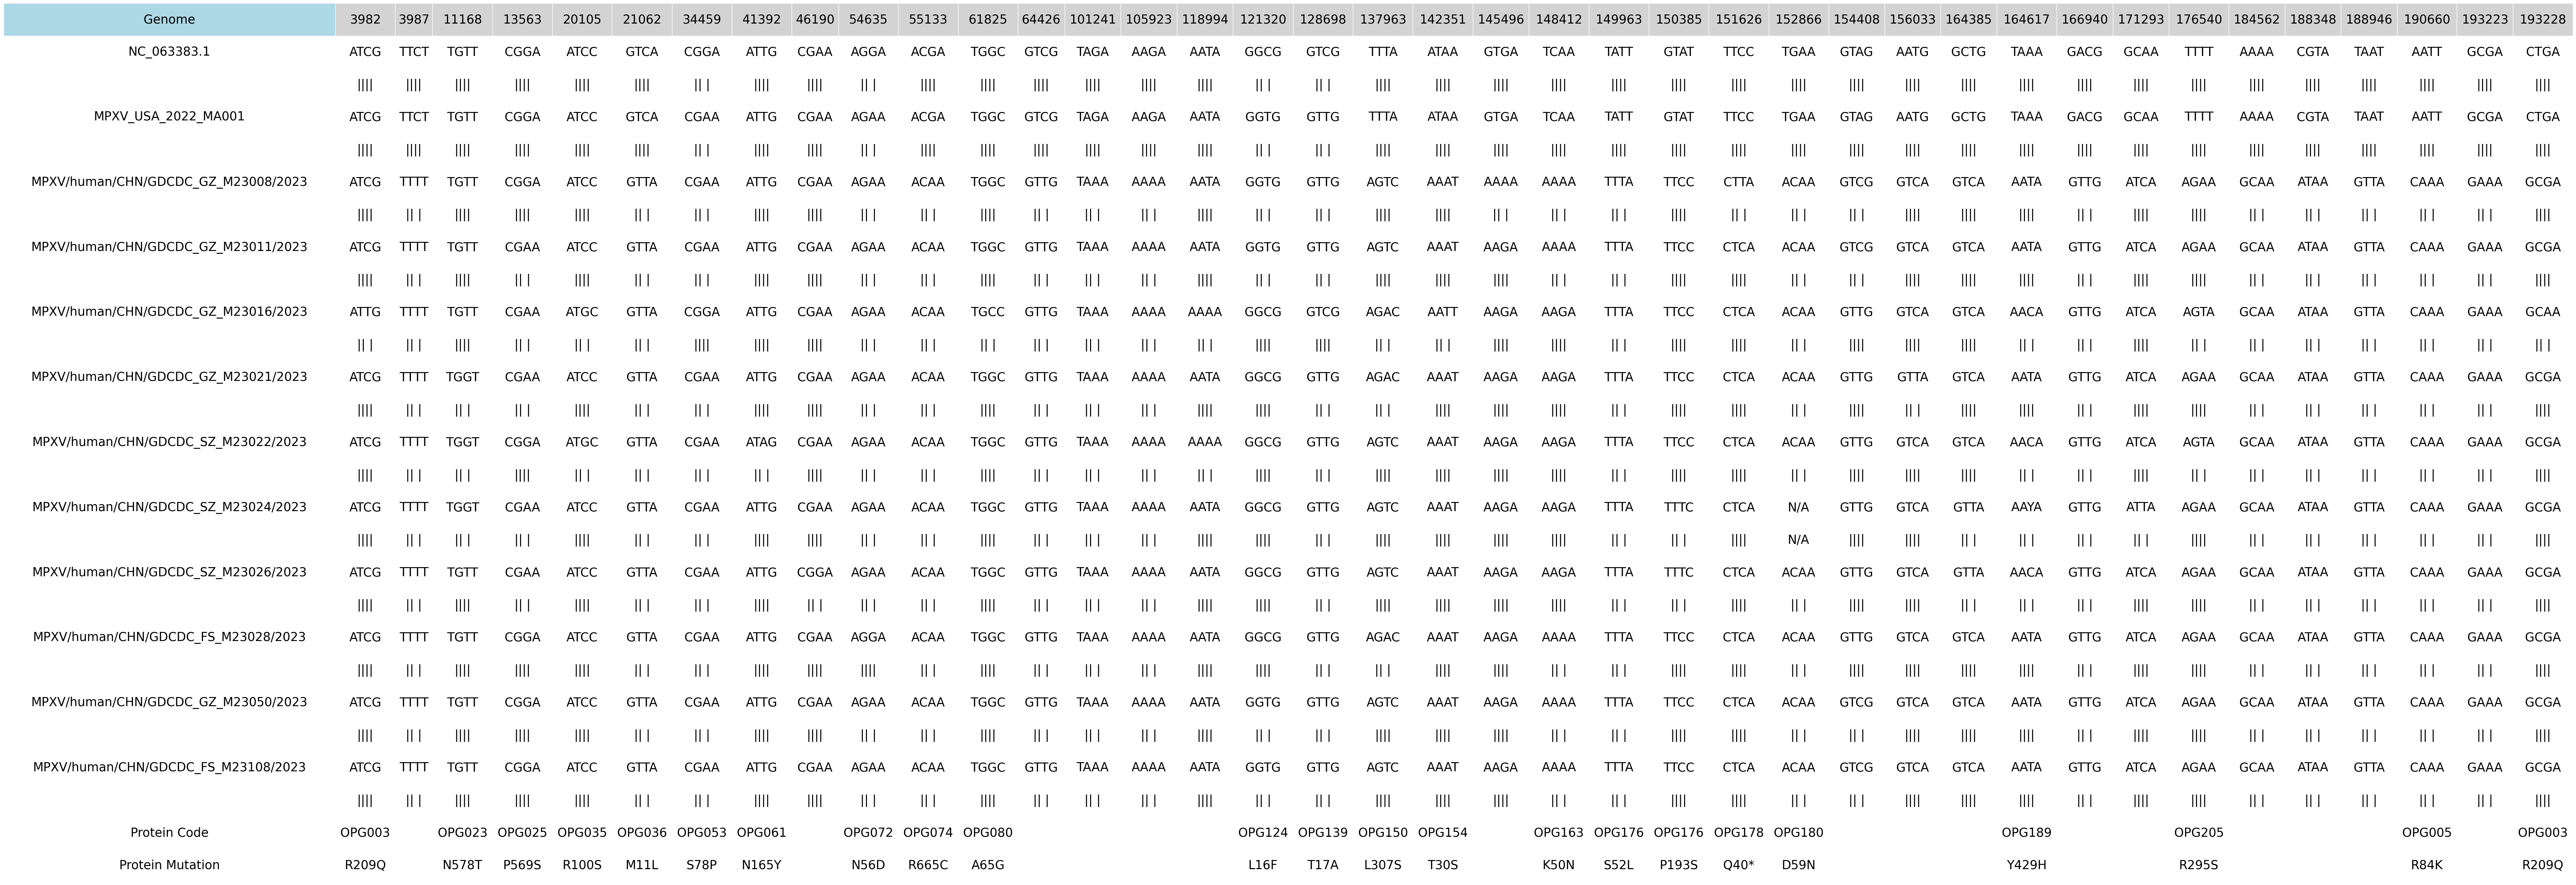

In [ ]:
positions = [
    3982, 3987, 11168,13563, 20105,21062, 34459, 41392,46190, 54635, 55133, 61825, 64426, 101241, 105923,
    118994, 121320, 128698, 137963, 142351, 145496, 148412, 149963, 150385, 151626, 152866, 154408, 156033,
    164385, 164617, 166940, 171293, 176540, 184562, 188348, 188946, 190660, 193223, 193228
]

flanking_length = 2

# Run the function
run_blast_and_print_table(subject_file, query_files, positions, flanking_length, output_image="table.png")


In [ ]:
from IPython.display import Image, display

display(Image("table.png"))


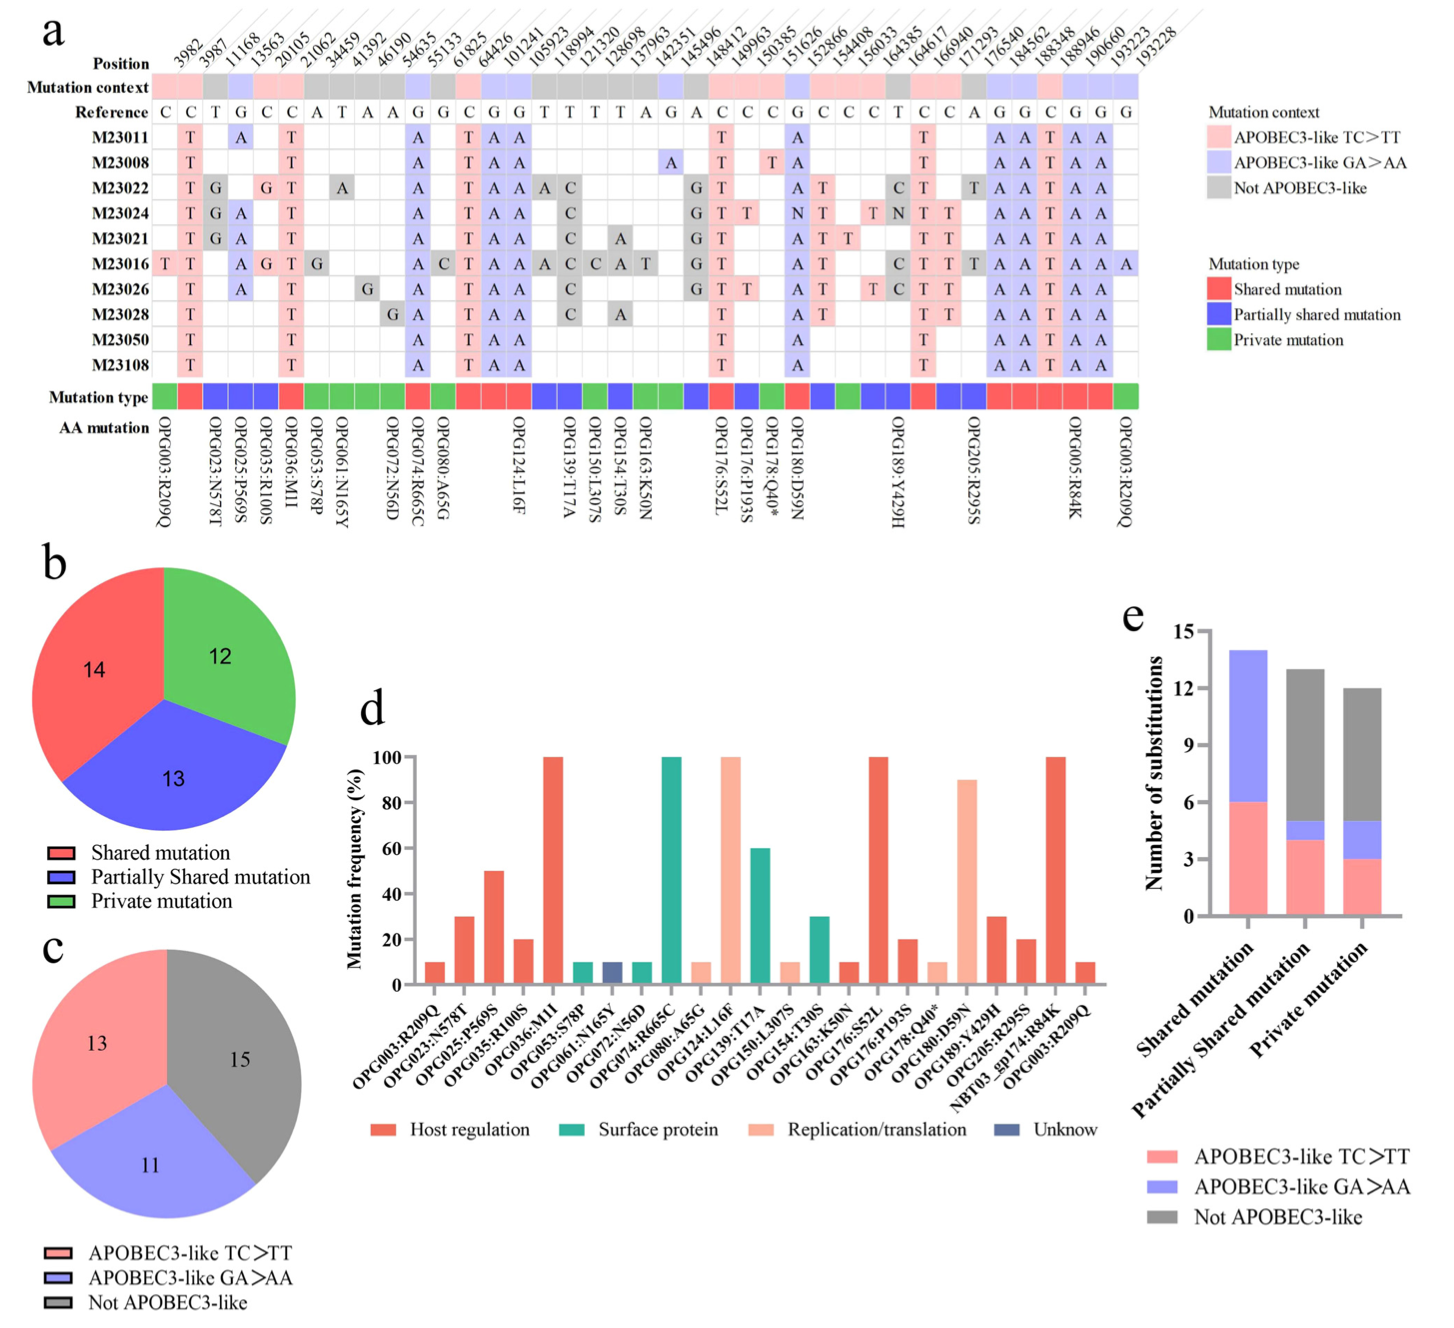

In [ ]:
from IPython.display import Image, display

display(Image("figure2.png",width=1000,height=1000))